In [1]:
names=["Aundh.csv","Baner.csv","Chinchwad.csv","Dapodi.csv","Dattawadi.csv","DP.csv","gurav.csv","Kalewadi.csv","kothrud.csv","pashan.csv","pimpri.csv","rto.csv","shantinagar.csv","Shivajinagar.csv","Someshwarwadi.csv","Vitthalwadi.csv","warje.csv","Yerwada.csv"]
import folium

# Define the coordinates of your points
points = {
    'Aundh-Sangvi 28': (18.5689,73.8175),
    'Baner-32': (18.5590,73.7868),
    'Chinchwad-3': (18.6298, 73.7997),
    'Dapodi-31': (18.5853, 73.8334),
    'Dattawadi-19': (18.4961, 73.8384),
    'DP road-38': (18.5296, 73.8760 ),
    'Pimple gurav-32': (18.5866, 73.8134),
    'Kalewadi-10': (18.6171, 73.7903),
    'kothrud-44': (18.5074, 73.8077),
    'pashan-1': (18.5415, 73.7925),
    'pimpri-25': (18.6298, 73.7997),
    'Yerwada rto -17': (18.5529, 73.8797),
    'Shivajinagar-76': (18.5314, 73.8446),
    'Someshwarwadi-7': (18.5467, 73.8022),
    'Vitthalwadi-19': (18.4818, 73.8296),
    'warje-29': (18.4865, 73.7968),
    'Yerwada-22': (18.5529, 73.8797),
}

# Create a map object centered on the first point
m = folium.Map(location=list(points.values())[0], zoom_start=13)

# Add markers for each point
for name, coord in points.items():
    folium.Marker(coord, tooltip=name).add_to(m)

# Display the map
m

In [2]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

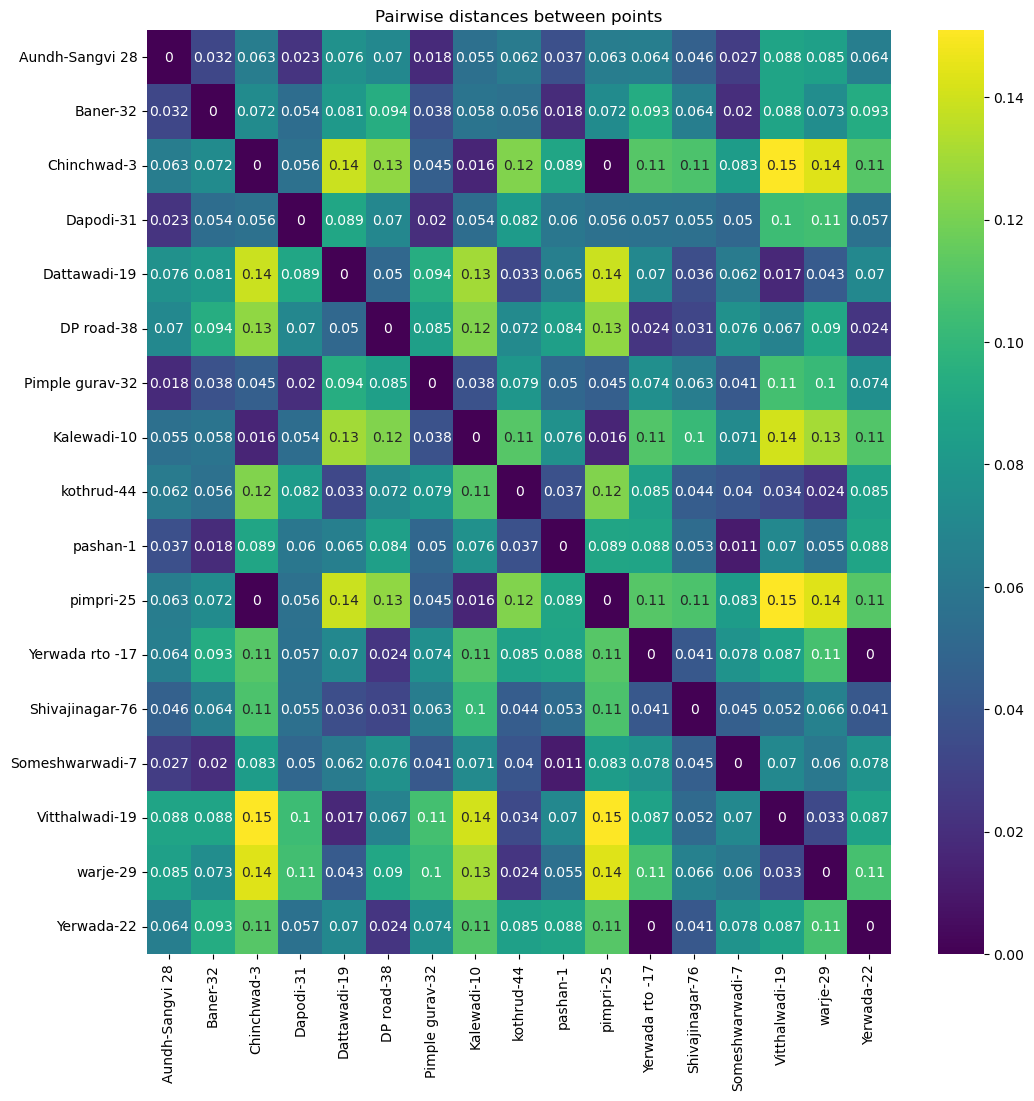

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate pairwise distances
distances = np.zeros((len(points), len(points)))
for i, (name_i, coord_i) in enumerate(points.items()):
    for j, (name_j, coord_j) in enumerate(points.items()):
        if i != j:
            distances[i, j] = np.sqrt((coord_i[0]-coord_j[0])**2 + (coord_i[1]-coord_j[1])**2)

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(distances, cmap='viridis', annot=True, xticklabels=list(points.keys()), yticklabels=list(points.keys()))
plt.title('Pairwise distances between points')
plt.show()

In [4]:
import numpy as np

# Calculate pairwise distances
distances = []
for name_i, coord_i in points.items():
    for name_j, coord_j in points.items():
        if name_i != name_j:
            distance = np.sqrt((coord_i[0]-coord_j[0])**2 + (coord_i[1]-coord_j[1])**2)
            distances.append((name_i, name_j, distance))

# Sort distances in ascending order
distances.sort(key=lambda x: x[2])

# Print distances in ascending order
for name_i, name_j, distance in distances:
    print(f"{name_i} to {name_j}: {distance:.2f}")

Chinchwad-3 to pimpri-25: 0.00
pimpri-25 to Chinchwad-3: 0.00
Yerwada rto -17 to Yerwada-22: 0.00
Yerwada-22 to Yerwada rto -17: 0.00
pashan-1 to Someshwarwadi-7: 0.01
Someshwarwadi-7 to pashan-1: 0.01
Chinchwad-3 to Kalewadi-10: 0.02
Kalewadi-10 to Chinchwad-3: 0.02
Kalewadi-10 to pimpri-25: 0.02
pimpri-25 to Kalewadi-10: 0.02
Dattawadi-19 to Vitthalwadi-19: 0.02
Vitthalwadi-19 to Dattawadi-19: 0.02
Aundh-Sangvi 28 to Pimple gurav-32: 0.02
Pimple gurav-32 to Aundh-Sangvi 28: 0.02
Baner-32 to pashan-1: 0.02
pashan-1 to Baner-32: 0.02
Baner-32 to Someshwarwadi-7: 0.02
Someshwarwadi-7 to Baner-32: 0.02
Dapodi-31 to Pimple gurav-32: 0.02
Pimple gurav-32 to Dapodi-31: 0.02
Aundh-Sangvi 28 to Dapodi-31: 0.02
Dapodi-31 to Aundh-Sangvi 28: 0.02
kothrud-44 to warje-29: 0.02
warje-29 to kothrud-44: 0.02
DP road-38 to Yerwada rto -17: 0.02
DP road-38 to Yerwada-22: 0.02
Yerwada rto -17 to DP road-38: 0.02
Yerwada-22 to DP road-38: 0.02
Aundh-Sangvi 28 to Someshwarwadi-7: 0.03
Someshwarwadi-7 to 